Brief : AED - Cardiaque

Etape 1 : importation des bibliothèques utiles et du jeu de données

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cardiaque=pd.read_csv('cardiaque.csv')
cardiaque.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


Etape 2 : vérifier qu'il n'y a pas de données manquantes (ce qui n'est pas le cas ici)

In [2]:
cardiaque.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

J'ai dupliqué le fichier 'cardiaque' en 'cardiaque_bis' afin de voir la méthode 'dropna'. J'ai modifié le fichier 'cardiaque_bis.csv' en supprimant l'âge de la ligne 8, ce qui donc provoque une valeur manquante. Dans ce cas, il y a deux solutions, soit supprimer la ligne soit utilisé la moyenne pour compléter la valeur manquante. Je pense qu'il faut mieux supprimer la ligne car l'âge moyen peut être très loin de la valeur manquante.

In [3]:
cardiaque_bis=pd.read_csv('cardiaque_bis.csv')
cardiaque_bis.head()

cardiaque_bis.isnull().sum()

age         1
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Ici j'utilise donc la fonction 'dropna()' pour supprimer la ligne où il y a une valeur manquante. On voit que cela a fonctionné car on est passé de 303 lignes de données dans le fichier csv à 302 comme indiqué sous le tableau. Pour la suite je vais utiliser le fichier 'cardiaque.csv' qui n'est pas corrompu.

In [4]:
cardiaque_bis.dropna()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37.0,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41.0,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56.0,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57.0,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,F,0,140,241,0,1,123,yes,0.2,1,0,3,less chance
299,45.0,M,3,110,264,0,1,132,no,1.2,1,0,3,less chance
300,68.0,M,0,144,193,1,1,141,no,3.4,1,2,3,less chance
301,57.0,M,0,130,131,0,1,115,yes,1.2,1,1,3,less chance


Je fais en premier un pairplot pour avoir une vue d'ensemble sur les relations entres les données en fonction du output (more or less chance to survive), et aussi une 'heatmap', cela permet de déterminer les relations intéressantes à approfondir car tout n'est pas forcément utile.

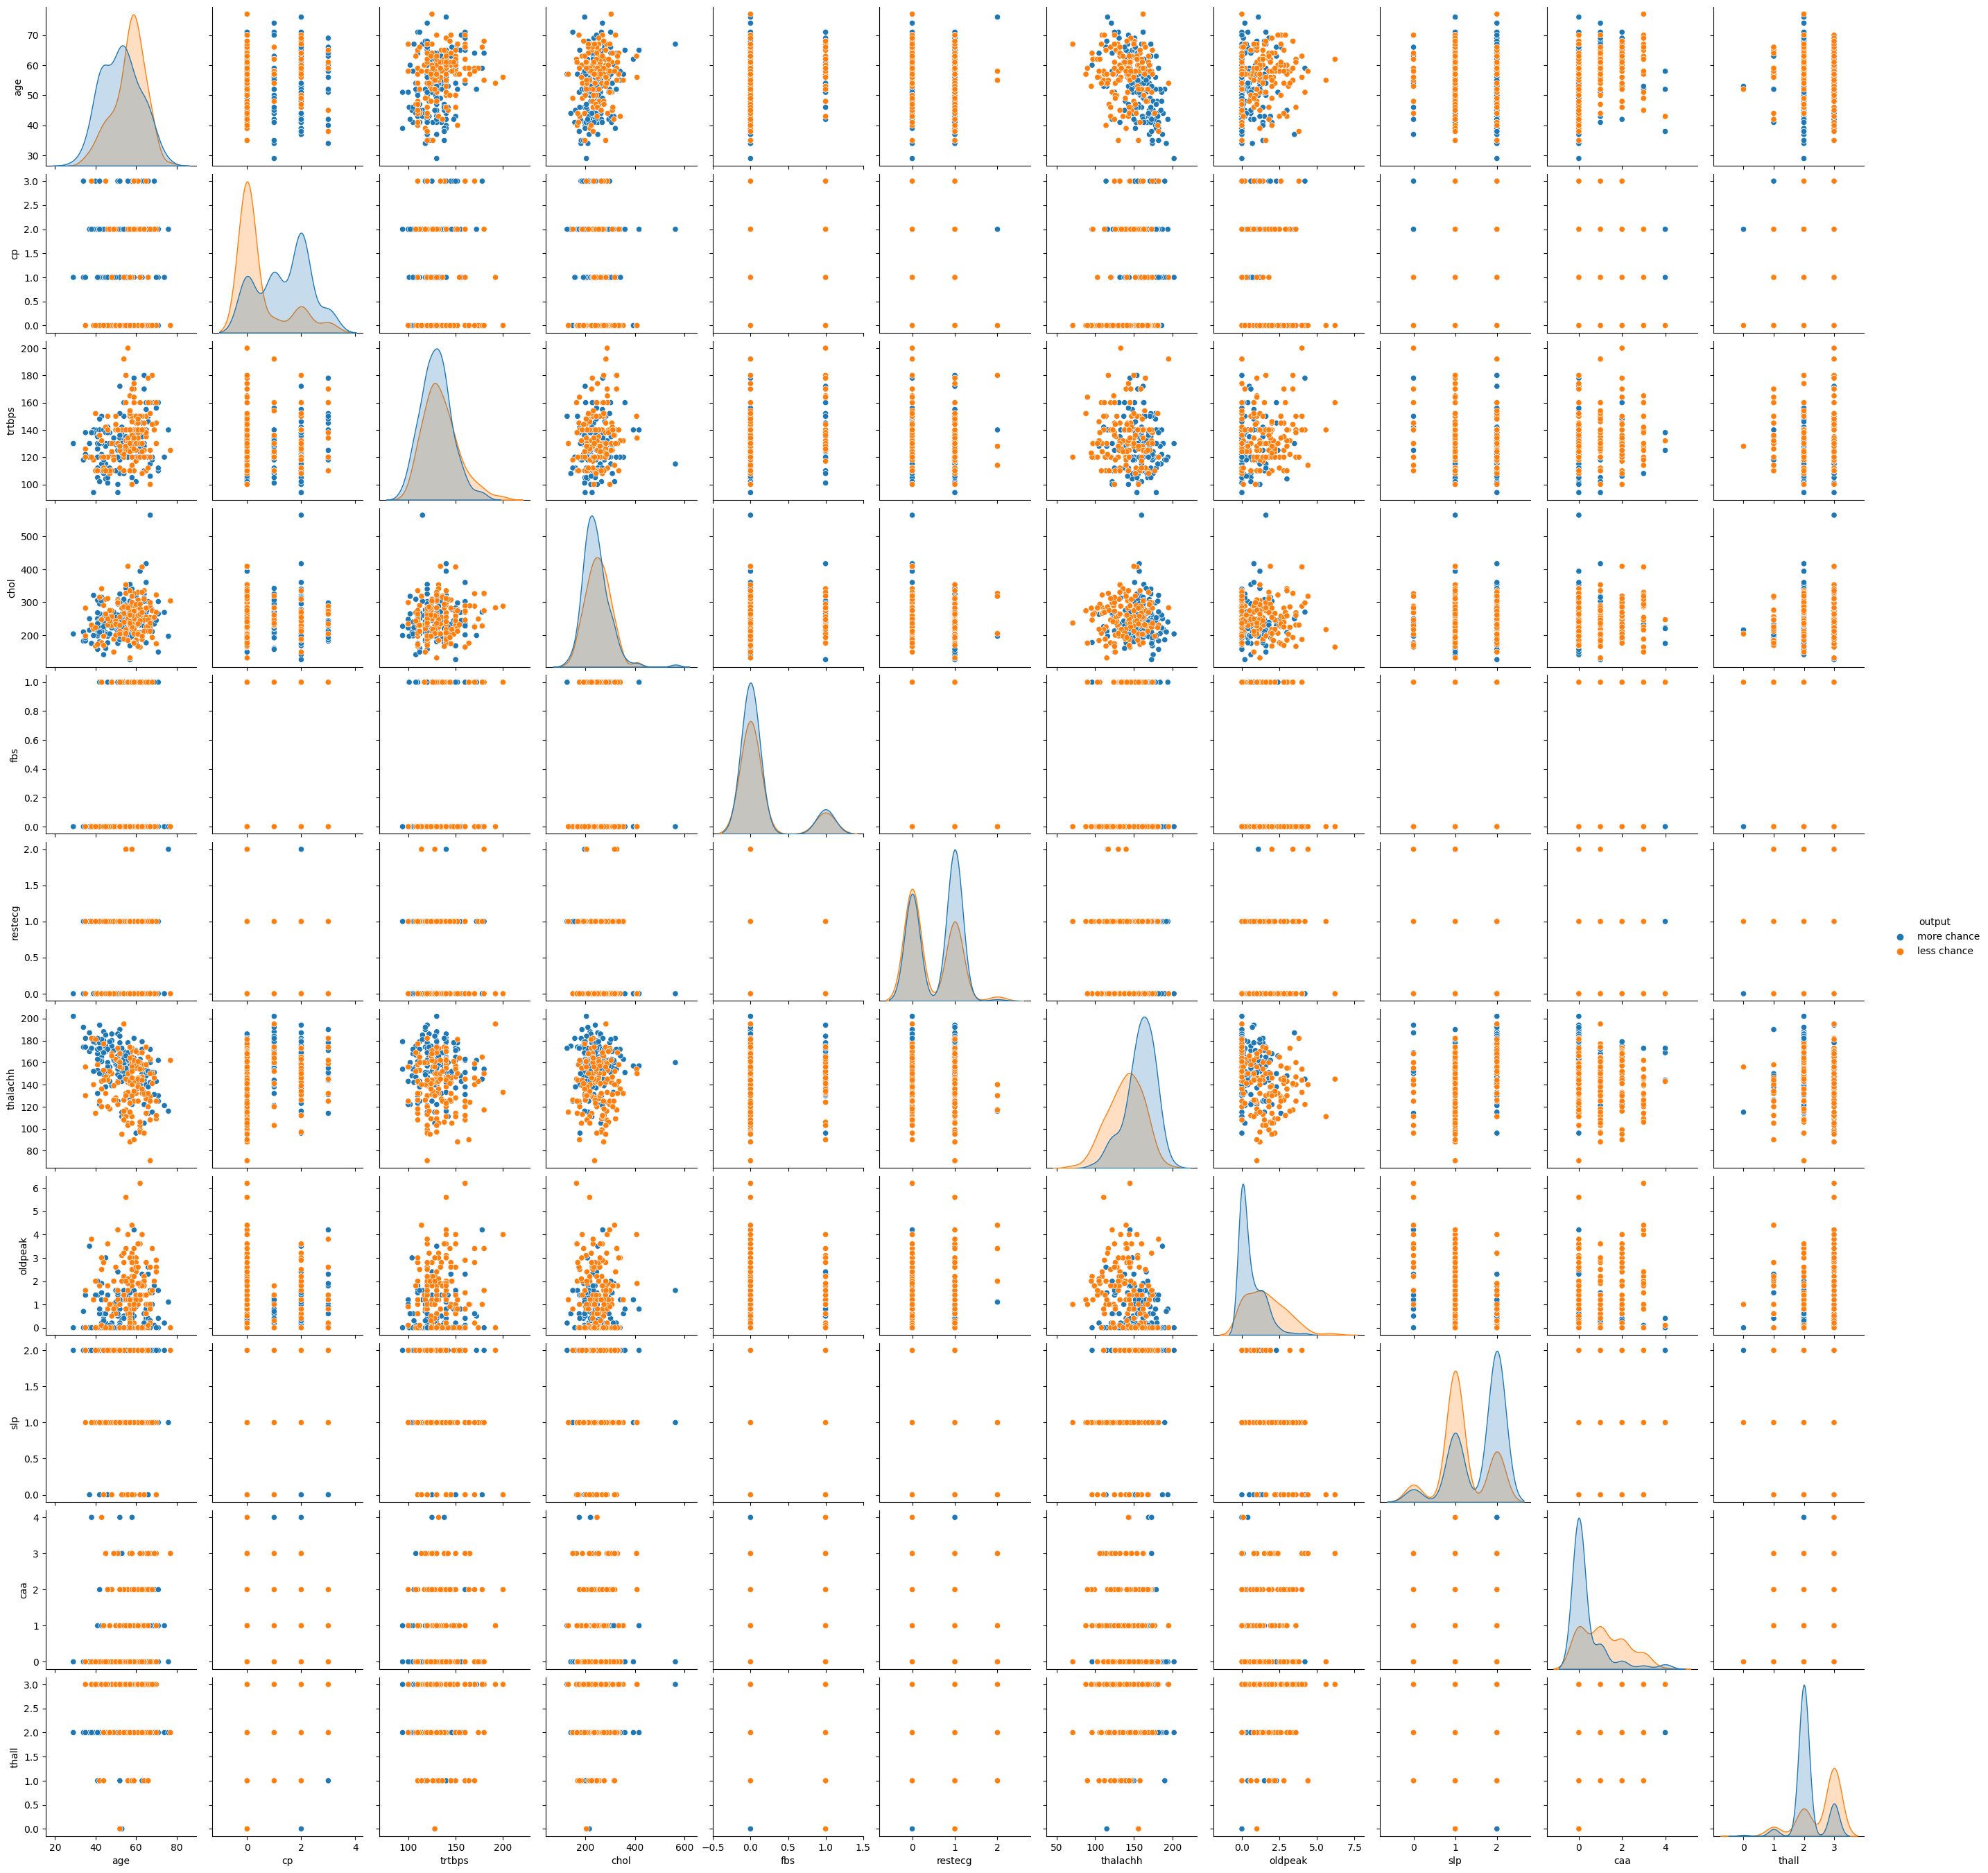

In [5]:
sns.pairplot(cardiaque, hue='output')
plt.show()

/tmp/ipykernel_458/67164439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardiaque.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':5})


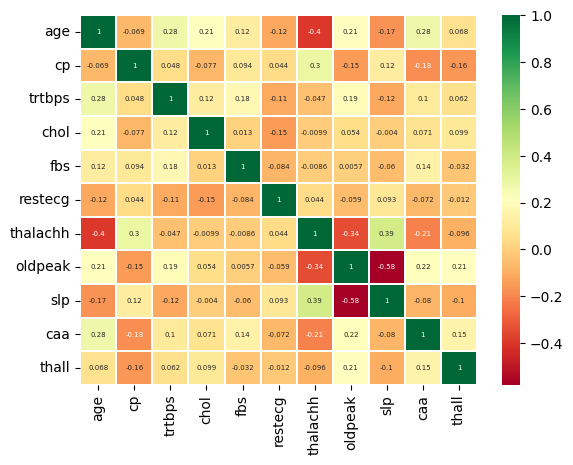

In [6]:
sns.heatmap(cardiaque.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':5})
plt.show()

Ici on observe que dans le 1er graphique (haut à gauche) que dans l'échantillon de personne, il y a plus de chance de manière générale de faire un arrêt cardiaque car que ça soit pour les hommes ou pour les femmes. On voit quand même qu'il y a un plus grand nombre de femme qui ont des risque d'arrêt cardiaque et de plus, leur étendue d'âge est plus grand que celui des hommes. Dans le graphique 3 (bas à gauche), on peut interpréter que les douleurs à la poitrine varient selon leur type, l'âge du patient et son sexe. Par exemple, il y a une plus grande étendue d'homme qui peut avoir un CP0 (la majorité entre 50 et 60ans), mais aussi une CP3 (la majorité entre environ 48 et 54ans), c'est l'inverse pour les femmes, l'étendu est assez faible pour la CP3 (entre environ 62 et 68ans). Enfin dans le graphique 4 (bas à droite), on peut voir qu'il y a une plus faible étendue de femme avec un taux de sucre dans le sang > 120 mg/dl que d'hommes. Pour les femmes par exemple, cette étendue se situe entre environ 57 et 63 ans.

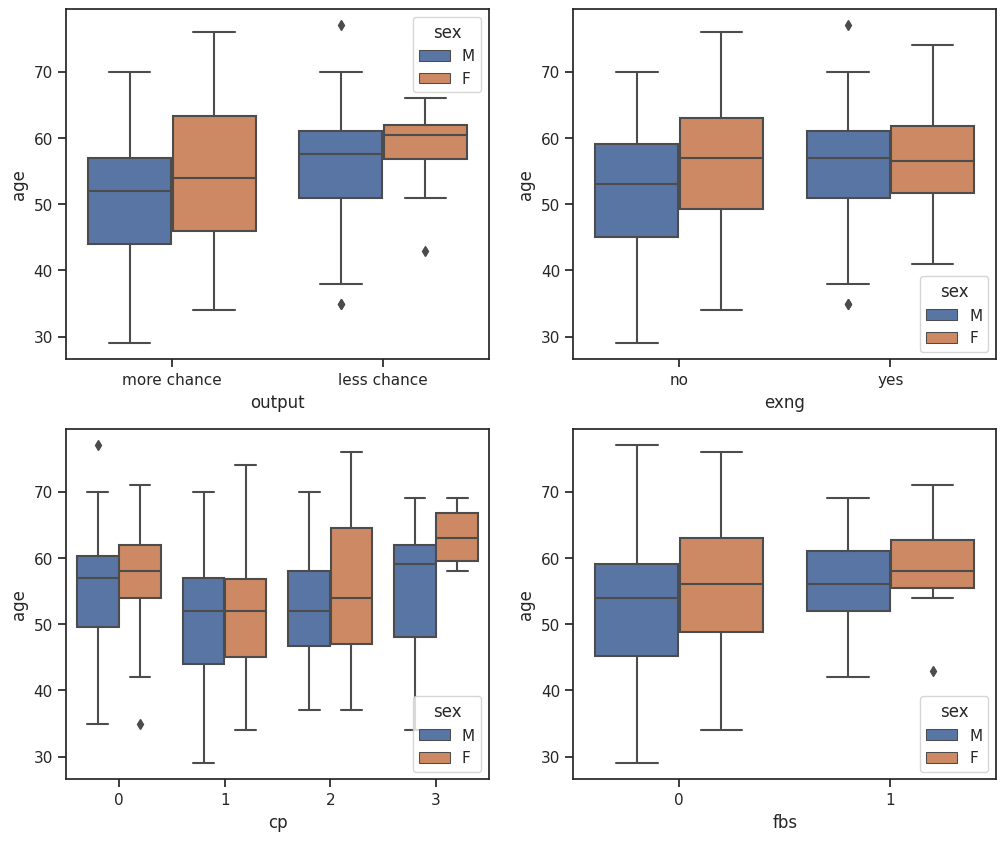

In [33]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='output', y='age', data=cardiaque, hue='sex')
plt.subplot(2,2,2)
sns.boxplot(x='exng', y='age', data=cardiaque, hue='sex')
plt.subplot(2,2,3)
sns.boxplot(x='cp', y='age', data=cardiaque, hue='sex')
plt.subplot(2,2,4)
sns.boxplot(x='fbs', y='age', data=cardiaque, hue='sex')
plt.show()

Ici on observe grâce aux deux couleurs qu'il y a plus de risque de faire un arrêt cardiaque chez les femmes et surtout lorsqu'elles avancent en âge. A l'inverse, une majorité d'homme sont dans la catégorie "moins de chance" de faire un arrêt cardiaque.

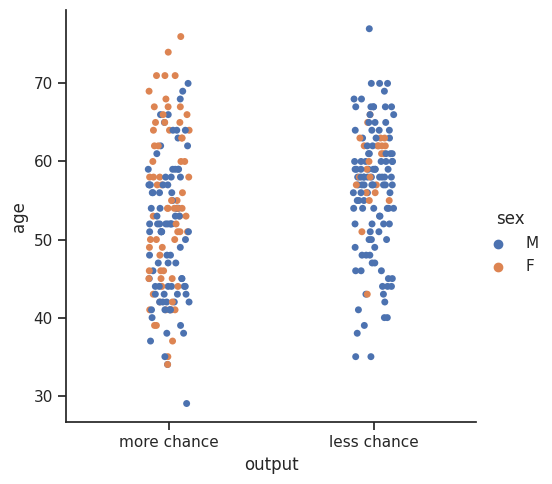

In [34]:
sns.catplot(x='output', y='age', data=cardiaque, hue='sex')
plt.show()

Grâce à ce graphique on peut dire qu'il y a plus d'hommes qui ont fait des angines d'effort et une majorité entre 50 et 70 ans. Mais il y a quand même environ 2/3 de la population de l'étude qui n'en a pas fait.

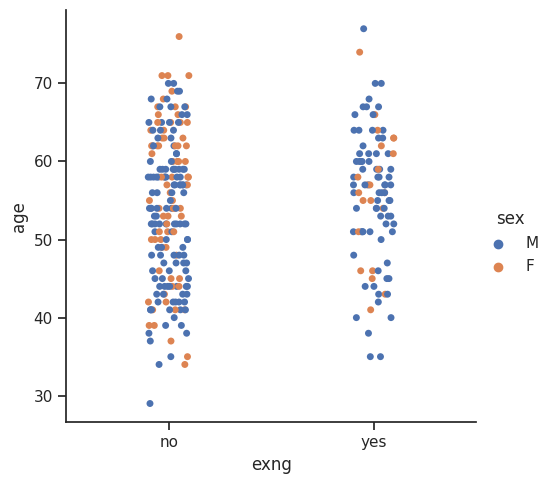

In [35]:
sns.catplot(x='exng', y='age', data=cardiaque, hue='sex')
plt.show()

Ce graphique est intéressant car il va permettre d'éliminer la variablme 'fbs', car on voit que peu importe l'âge et le sexe, une très grand majorité de la populaiton de l'étude a un taux de sucre dans le sang < 120 mg/dl.

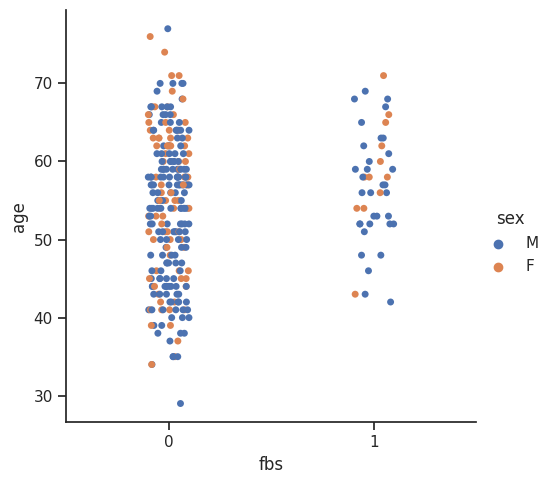

In [37]:
sns.catplot(x='fbs', y='age', data=cardiaque, hue='sex')
plt.show()

Enfin, sur ce graphique on voit que les femmes avec un taux de cholesterol élevé ont plus de risque de faire un arrêt cardique. Pour les hommes cela sembble être du 50/50.

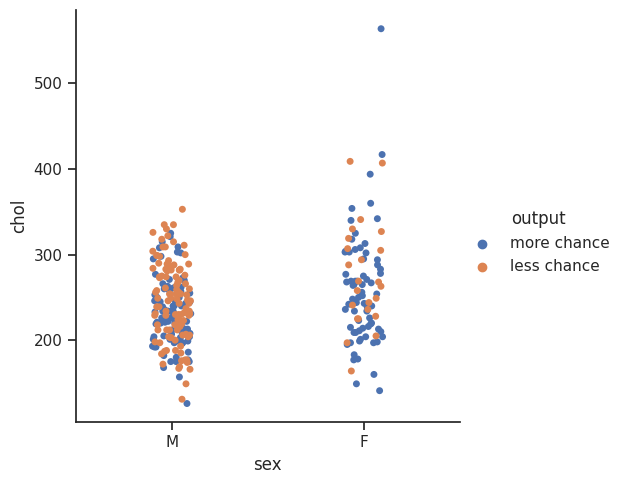

In [47]:
sns.catplot(data=cardiaque, x='sex', y='chol', hue='output')
plt.show()

Il faut ensuite encoder les valeurs qualitatives en valeurs numériques pour faciliter l'apprentissage au modèle.

In [53]:
from sklearn.preprocessing import LabelEncoder 

transform = LabelEncoder()
cardiaque["sex"] = transform.fit_transform(cardiaque.sex)
cardiaque["output"] = transform.fit_transform(cardiaque.output)
cardiaque["exng"] = transform.fit_transform(cardiaque.exng)

cardiaque.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Ici on prépare les données pour ensuite faire le split du jeux de données.

In [55]:
x = cardiaque.iloc[:,:-1]
y = cardiaque["output"]

print(x.shape)
print(y.shape)
names = list (np.unique(cardiaque["output"]))

print(f'x contient {x.shape[0]} patients et {x.shape[1]} variables')
print(f'il y a {np.unique(y).size} résultats possibles')
print(names)


(303, 13)
(303,)
x contient 303 patients et 13 variables
il y a 2 résultats possibles
[0, 1]


On fait maintenant le split du jeu de données, en prenant 80% des données pour le 'Train Set' et 20% pour le 'Test Set' à utiliser à la fin.

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('train_set:', x_train.shape)
print('test_set:', x_test.shape)

train_set: (242, 13)
test_set: (61, 13)


La dernière étape consiste à mettre à l'échelle les valeurs pour qu'elles soient cohérentes pour fonctionner et entraîner correctement le modèle, surtout faciliter son apprentissage et gagner en rapidité et donc en efficacité.

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_standard = StandardScaler().fit_transform(x_train)
scaler_minmax = MinMaxScaler().fit_transform(x_train)
scaler_robust = RobustScaler().fit_transform(x_train)